In [580]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('psglgd.csv').iloc[:, 1:]
dataset.head()

,match_id,opposing_team_id,side,duration,my_hero_1,my_hero_2,my_hero_3,my_hero_4,my_hero_5,opposing_hero_1,...,opposing_hero_3,opposing_hero_4,opposing_hero_5,my_team_kills,opposing_team_kills,gold_adv,xp_adv,my_tower_status,opposing_team_tower_status,win
0,6809621786,7732977,dire,1901,136,11,61,87,17,85,...,43,46,19,28,13,19623,18197,1974,1536,1
1,6809585544,7732977,radiant,1613,137,52,91,18,7,129,...,74,68,10,22,6,24806,29717,1983,1572,1
2,6809420587,6209804,radiant,1672,137,66,114,38,119,11,...,128,120,64,32,9,15500,16130,1983,1536,1
3,6808199906,2163,radiant,2583,33,19,110,13,10,85,...,86,35,2,20,25,10673,18586,1956,288,1
4,6808106195,2163,radiant,2785,33,19,25,87,54,137,...,52,38,99,32,29,14209,32044,1828,0,1


In [581]:
dataset['opposing_team_id'].nunique()

134

In [582]:
pd.DataFrame({'columns': dataset.columns.tolist()})

,columns
0,match_id
1,opposing_team_id
2,side
3,duration
4,my_hero_1
5,my_hero_2
6,my_hero_3
7,my_hero_4
8,my_hero_5
9,opposing_hero_1


In [583]:
X = dataset.iloc[:, [1, 2, 3, 14, 15, 17, 18, 19]].values #16-17 too dependent
y = dataset.iloc[:, 16].values

In [584]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [585]:
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [586]:
X[0:5]

array([[115, 0, 1901, 28, 13, 18197, 1974, 1536],
       [115, 1, 1613, 22, 6, 29717, 1983, 1572],
       [95, 1, 1672, 32, 9, 16130, 1983, 1536],
       [8, 1, 2583, 20, 25, 18586, 1956, 288],
       [8, 1, 2785, 32, 29, 32044, 1828, 0]], dtype=object)

In [587]:
y[:10]

array([ 19623,  24806,  15500,  10673,  14209,  23301,  21705, -15419,
        19336,   3351], dtype=int64)

In [588]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Multiple Linear Regression

In [589]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [590]:
y_pred = regressor.predict(X_test)

In [591]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8567648657929507

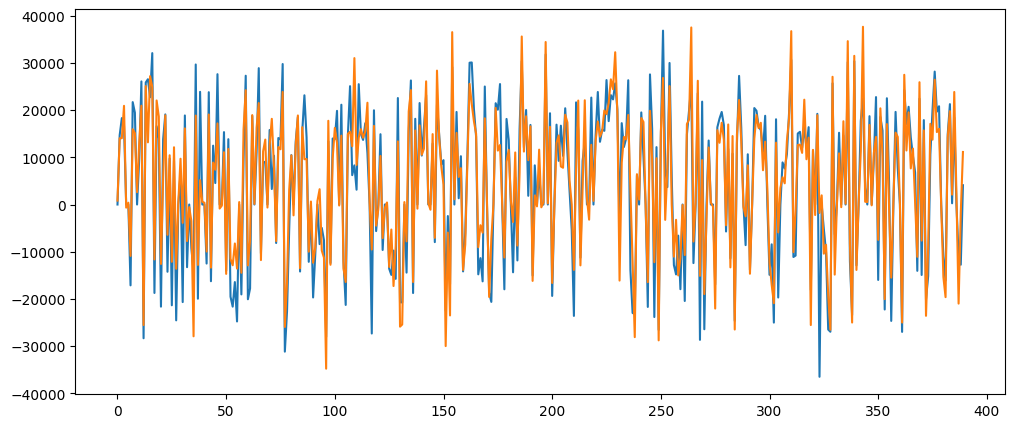

In [592]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred)

### Polynomial Regression

In [593]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)

In [594]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [595]:
y_pred = regressor.predict(pf.transform(X_test))

In [596]:
r2_score(y_test, y_pred)

0.8862250529019409

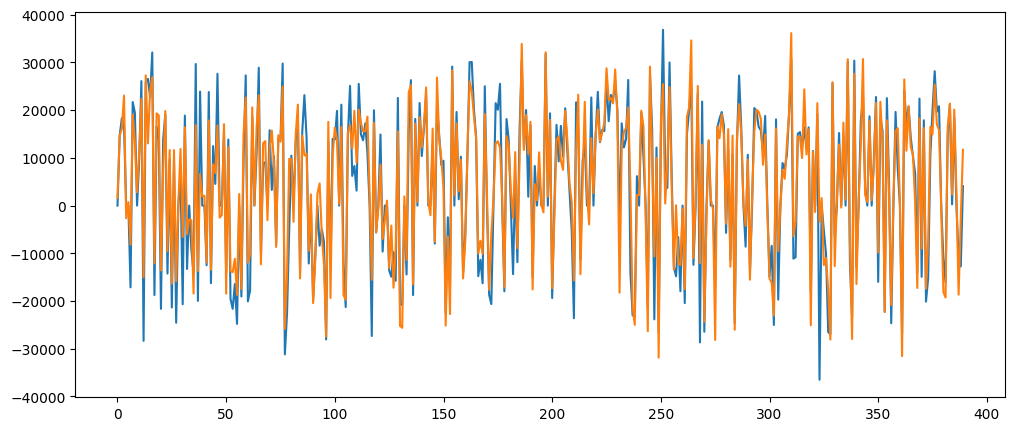

In [597]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred)

### Support Vector Regression

In [598]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)
y_train_sc = sc_y.fit_transform(y_train.reshape(-1, 1))

In [599]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', degree=3)
regressor.fit(X_train_sc, y_train_sc)

c:\Users\User\PycharmProjects\MachineLearningA-Z\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [600]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test_sc).reshape(-1, 1))

In [601]:
r2_score(y_test, y_pred)

0.9031486637131503

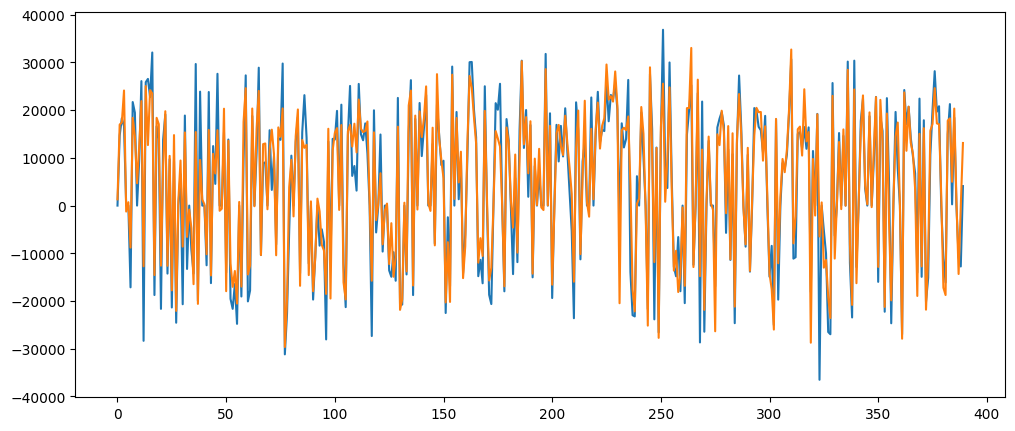

In [602]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred)

### Decision Tree Regression

In [603]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [604]:
y_pred = regressor.predict(X_test)

In [605]:
r2_score(y_test, y_pred)

0.7723524472486483

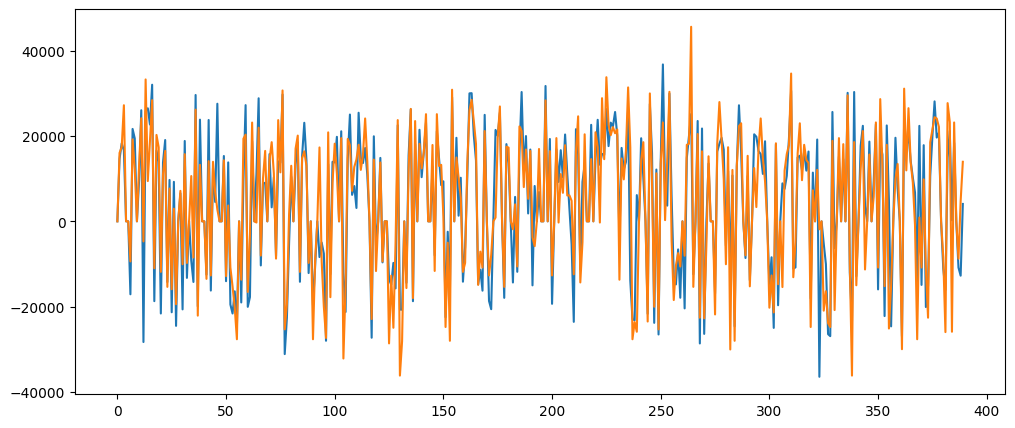

In [606]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred)

### Random Forest Regression

In [607]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, random_state=1)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [608]:
y_pred = regressor.predict(X_test)

In [609]:
r2_score(y_test, y_pred)

0.8985683710797115

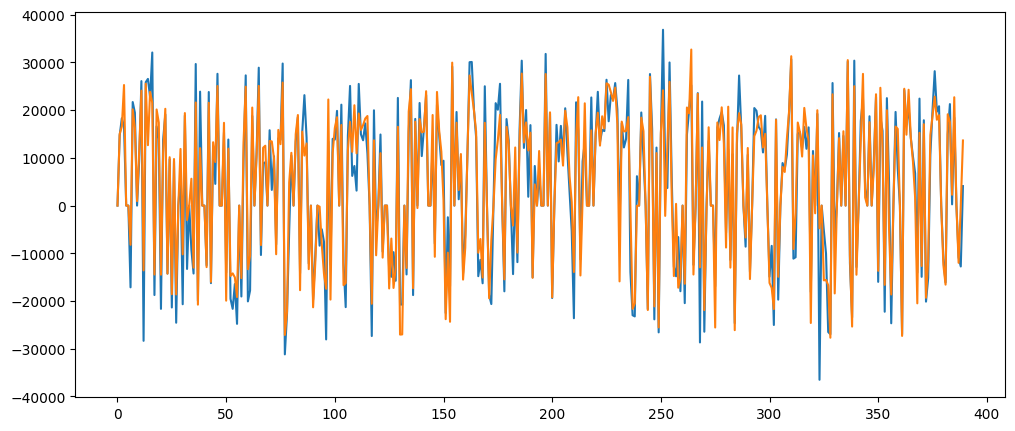

In [610]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), y_pred)